Dataset Head:
   SquareFeet  Bedrooms  Bathrooms  SalePrice
0        3983         3          1     666433
1        3515         4          3     640220
2        3558         5          2     705628
3        3035         6          3     629530
4        2107         3          2     415799

Model Coefficients: [  150.6874529  15326.46444832 19132.72709961]
Model Intercept: 19381.454781559936
Mean Squared Error: 3852165562.8732862
R² Score: 0.8775294953853652

Predicted Price for sample house: 405001.2081164933


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


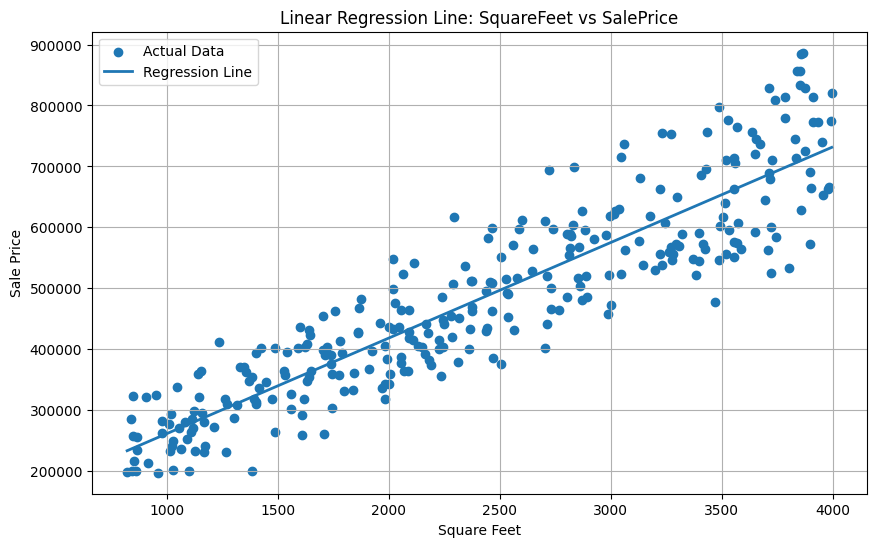

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv("/content/house_price_dataset.csv")

print("Dataset Head:")
print(df.head())

# -----------------------------
# 2. Select Features and Target
# -----------------------------
X = df[['SquareFeet', 'Bedrooms', 'Bathrooms']]
y = df['SalePrice']

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 4. Train Linear Regression
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# 5. Predict and Evaluate
# -----------------------------
y_pred = model.predict(X_test)

print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# -----------------------------
# 6. Example Prediction
# -----------------------------
new_house = [[2000, 3, 2]]  # 2000 sq.ft, 3 bedrooms, 2 bathrooms
predicted_price = model.predict(new_house)
print("\nPredicted Price for sample house:", predicted_price[0])

# -----------------------------
# 7. Linear Regression Graph (SquareFeet vs SalePrice)
# -----------------------------

plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(df['SquareFeet'], df['SalePrice'], label="Actual Data")

# Build a simple model using only SquareFeet for plotting
model_single = LinearRegression()
model_single.fit(df[['SquareFeet']], y)

# Generate line points
x_line = np.linspace(df['SquareFeet'].min(), df['SquareFeet'].max(), 100).reshape(-1, 1)
y_line = model_single.predict(x_line)

# Plot regression line
plt.plot(x_line, y_line, label="Regression Line", linewidth=2)

plt.xlabel("Square Feet")
plt.ylabel("Sale Price")
plt.title("Linear Regression Line: SquareFeet vs SalePrice")
plt.legend()
plt.grid(True)
plt.show()

